# Hello World

This notebook is my first attempt at data analysis with captured CSV data from the Rigol DS1052E oscilloscope.

In [364]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Read CSV

In [365]:
csv = np.genfromtxt('data/helloworld.csv', delimiter=',', skip_header=2, usecols=(0, 1))
csv

array([[-0.00328,  2.2    ],
       [-0.00324,  2.22   ],
       [-0.0032 ,  2.2    ],
       ..., 
       [ 0.0206 ,  0.     ],
       [ 0.02064,  0.     ],
       [ 0.02068,  2.22   ]])

In [366]:
csv = np.transpose(csv)
time = csv[0] * 1000
voltage = csv[1]

### Plot

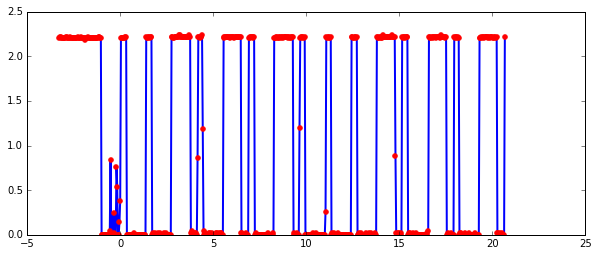

In [367]:
def oscilloscope(x, y, width=10, height=4, start=0, stop=None):
    fig = plt.figure(figsize=(width, height))
    axes = fig.add_subplot(111)
    axes.plot(x[start:stop], y[start:stop], marker='o', mec='red', mfc='red', markersize=5, linewidth=2)
    plt.show()

oscilloscope(time, voltage)

### Frequency Analysis

Finding out common voltage levels

In [368]:
counts, values = np.histogram(voltage)

def print_table(data, columns):
    print pd.DataFrame(data=data, columns=columns)

print_table(zip(counts, values), ['count', 'value'])

   count  value
0    316  0.000
1      3  0.224
2      1  0.448
3      4  0.672
4      0  0.896
5      2  1.120
6      0  1.344
7      0  1.568
8      0  1.792
9    274  2.016


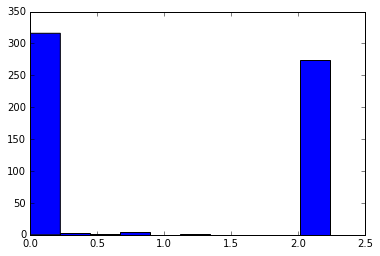

In [369]:
plt.hist(voltage)
plt.show()

In [370]:
print_table([(n, np.percentile(voltage, n)) for n in range(0, 100, 10)], ['percentile', 'value'])

   percentile  value
0           0   0.00
1          10   0.00
2          20   0.00
3          30   0.00
4          40   0.00
5          50   0.02
6          60   2.20
7          70   2.20
8          80   2.22
9          90   2.22


### Cleaning the Data

Creating a "digital stream"

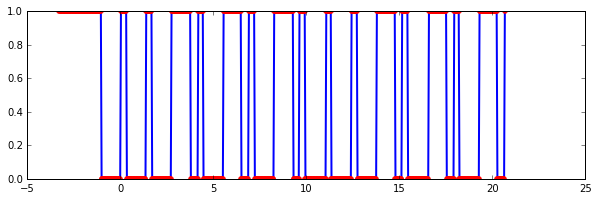

In [371]:
digital_one = np.percentile(voltage, 90)
digital_stream = voltage / digital_one
digital_stream = digital_stream.round()
oscilloscope(time, digital_stream, height=3)

### Next Steps

Nice, this is data I can work with. Next step is to convert this stream of highs and lows to something meaningful. I'm ready to capture all button presses and decode the bytes.